In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df= pd.read_excel('cleanerdata.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50367 entries, 0 to 50366
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50367 non-null  int64  
 1   Unnamed: 0.1   50367 non-null  int64  
 2   Country        50367 non-null  object 
 3   IDSTUD         50367 non-null  int64  
 4   ASBH02A        41503 non-null  object 
 5   ASBH02B        16269 non-null  object 
 6   ASBH03A        41179 non-null  object 
 7   ASBH04         27142 non-null  float64
 8   ASBH15A        23316 non-null  float64
 9   ASBH15B        20508 non-null  float64
 10  ASBH16         40406 non-null  float64
 11  ASBH17A        15016 non-null  float64
 12  ASBH17B        12722 non-null  float64
 13  ASBH18AA       26072 non-null  float64
 14  ASBH18AB       21042 non-null  float64
 15  ASBG01         37435 non-null  float64
 16  ASBG03         36188 non-null  float64
 17  ASBG10C        35913 non-null  float64
 18  ASBG10

In [2]:
column_list = df.columns.to_list()
# Join the list into a single string separated by ', '
# Format each column name with quotes
formatted_columns = ', '.join(f"'{col}'" for col in column_list)

# Print the formatted string
print(formatted_columns)

'Unnamed: 0', 'Unnamed: 0.1', 'Country', 'IDSTUD', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J', 'ASDAGE', 'ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05', 'MINAGEARRIVAL', 'rounded_ages', 'AASBG03'


In [3]:
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

In [4]:
non_assessment_score_columns = ['Country', 'IDSTUD', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']

In [5]:
demographic_info_columns = ['Country', 'IDSTUD', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages']

In [6]:
experience_in_school_columns = ['Country','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']

In [7]:
df = df.drop('AASBG03',axis=1)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

**I maybe want to get rid of the 9s? As they represent unanswered questions?**

I am interested in understanding the extent of missing data in my data set and where this data is present. I am going to use heatmaps to get a better idea of this.

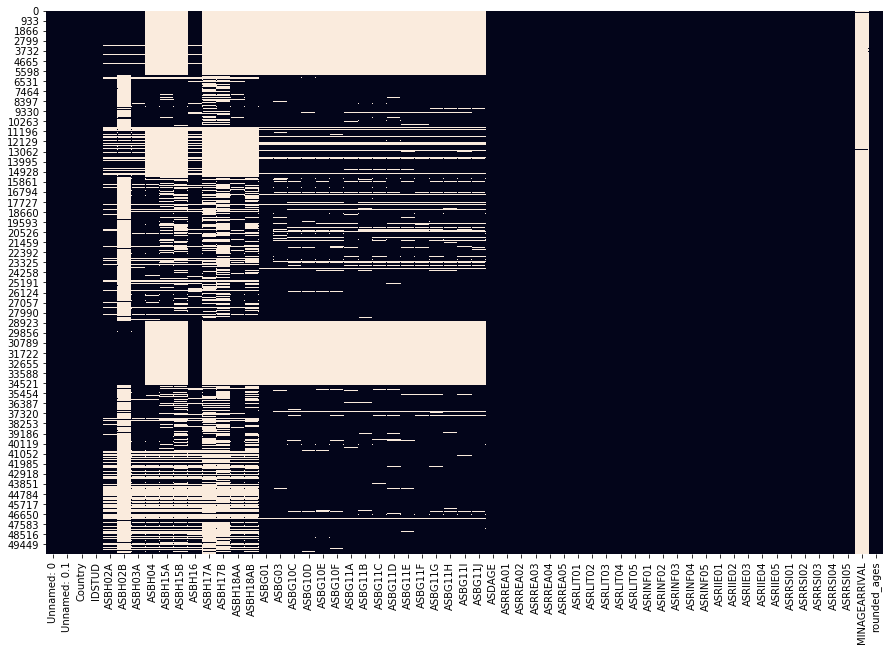

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cbar=False)

The above is very hard to read so we want to do this again but grouping by country this time.

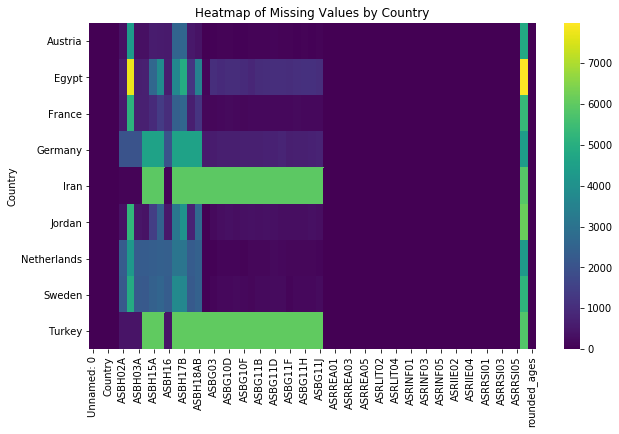

In [14]:
# Perform the Groupby Operation
grouped = df.groupby('Country')

# Aggregate with isnull
missing_values = grouped.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, annot=False, cmap='viridis', cbar=True)
plt.title('Heatmap of Missing Values by Country')
plt.show()

In [21]:
country_sizes = grouped.size()
print(country_sizes)

Country
Austria        4806
Egypt          7979
France         5339
Germany        4611
Iran           5962
Jordan         6150
Netherlands    4313
Sweden         5175
Turkey         6032
dtype: int64


This is still quite difficult to read so I want to break it down even more and look at missing values for the columns that are not pertaining to assessment as these seem to not contain any missing values.

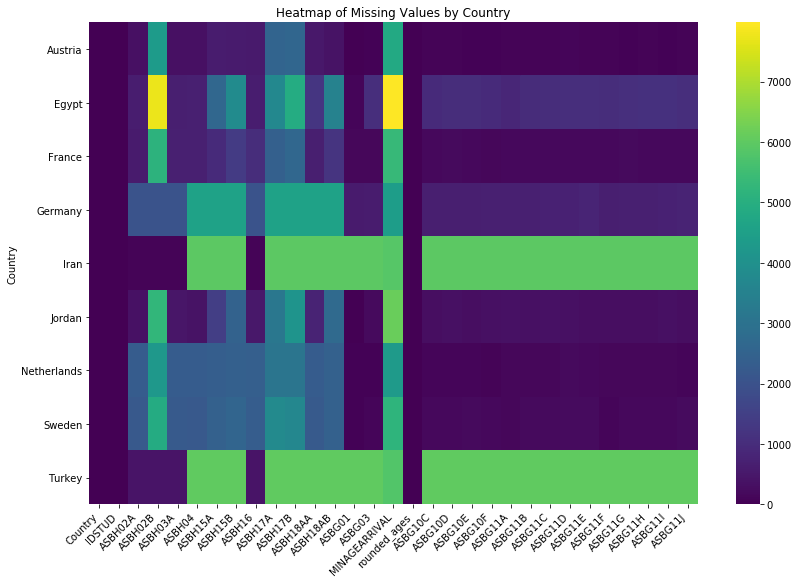

In [15]:
# Select the columns from the DataFrame
df_selected = df[non_assessment_score_columns]

# Perform the Groupby Operation
grouped_selection = df_selected.groupby('Country')

# Aggregate with isnull
missing_values_selection = grouped_selection.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(missing_values_selection, annot=False, cmap='viridis', cbar=True)
# Rotate the column names
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country')
plt.show()

There is a clear disparancy here between two groups of columns and I want to explore this in more detail. The first group of columns pertains to demographic information and the second group pertains to childrens' experience at school.

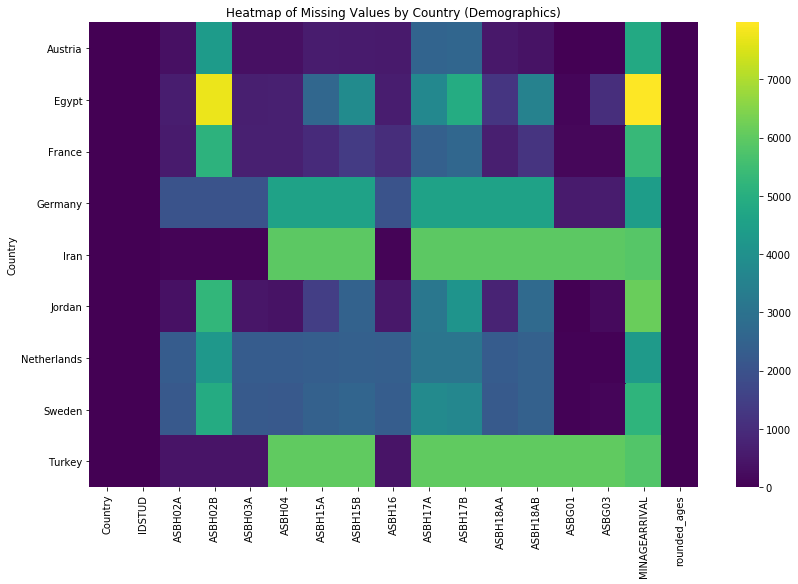

In [16]:
df_demographic = df[demographic_info_columns]

# Perform the Groupby Operation
grouped_selection_demographic = df_demographic.groupby('Country')

# Aggregate with isnull
missing_values_demographic = grouped_selection_demographic.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(12, 8))
demographicheatmap = sns.heatmap(missing_values_demographic, annot=False, cmap='viridis', cbar=True)

plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country (Demographics)')
plt.show()

**Egypt** is missing all of **ASBH02B** which is the age of the child when they came to the country and therefore the minimum age of arrival. It seems that **Turkey** and **Iran** are also missing quite a lot of demographic data pertaining to the level of education of parents and their jobs. Also **ASBG01** and **03** which is the sex and how often the language of the test is spoken at home. 

I want to explore these gaps in the Iran and Turkey data a little more. 

The total number of rows for Egypt is 7979. This is helpful to see how many values are missing across the columns.

In [17]:

missing_values_for_country = missing_values_demographic.loc['Egypt']

print(missing_values_for_country)

Country             0
IDSTUD              0
ASBH02A           625
ASBH02B          7759
ASBH03A           664
ASBH04            689
ASBH15A          2623
ASBH15B          3827
ASBH16            645
ASBH17A          3732
ASBH17B          4908
ASBH18AA         1227
ASBH18AB         3514
ASBG01            114
ASBG03           1053
MINAGEARRIVAL    7979
rounded_ages        1
Name: Egypt, dtype: int64


In [25]:
# Apply value_counts() to the 'Value' column for each group
value_counts_per_group = grouped['MINAGEARRIVAL'].apply(lambda x: x.value_counts(dropna=False))

print(value_counts_per_group)

Country         
Austria      NaN    4806
Egypt        NaN    7979
France       NaN    5339
Germany      NaN    4415
             3.0      75
             0.0      53
             6.0      36
             8.0      32
Iran         NaN    5872
             0.0      40
             6.0      19
             8.0      16
             3.0      15
Jordan       NaN    6150
Netherlands  NaN    4313
Sweden       NaN    5175
Turkey       NaN    5805
             0.0      89
             3.0      70
             6.0      53
             8.0      15
Name: MINAGEARRIVAL, dtype: int64


In [26]:
# Apply value_counts() to the 'Value' column for each group
value_counts_per_group = grouped['ASBH02A'].apply(lambda x: x.value_counts(dropna=False))

print(value_counts_per_group)

Country         
Austria      Yes    4025
             No      451
             NaN     330
Egypt        Yes    7071
             NaN     625
             No      283
France       Yes    4526
             NaN     571
             No      242
Germany      Yes    2317
             NaN    2038
             No      198
             9        58
Iran         Yes    5720
             No      120
             NaN      70
             9        52
Jordan       Yes    4822
             No      979
             NaN     349
Netherlands  NaN    2287
             Yes    1947
             No       79
Sweden       Yes    2681
             NaN    2186
             No      308
Turkey       Yes    5366
             NaN     408
             No      230
             9        28
Name: ASBH02A, dtype: int64


So, we want to remove the 9s and NaNs from the dataset and then take another look at these heatmaps. 

In [27]:
df_cleaned = df.dropna(subset= ['ASBH02A'])

In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41503 entries, 0 to 50364
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     41503 non-null  int64  
 1   Unnamed: 0.1   41503 non-null  int64  
 2   Country        41503 non-null  object 
 3   IDSTUD         41503 non-null  int64  
 4   ASBH02A        41503 non-null  object 
 5   ASBH02B        16269 non-null  object 
 6   ASBH03A        40913 non-null  object 
 7   ASBH04         26888 non-null  float64
 8   ASBH15A        23005 non-null  float64
 9   ASBH15B        20263 non-null  float64
 10  ASBH16         40023 non-null  float64
 11  ASBH17A        14850 non-null  float64
 12  ASBH17B        12612 non-null  float64
 13  ASBH18AA       25767 non-null  float64
 14  ASBH18AB       20840 non-null  float64
 15  ASBG01         29560 non-null  float64
 16  ASBG03         28488 non-null  float64
 17  ASBG10C        28378 non-null  float64
 18  ASBG10

So we have gone from 50000 rows to 41503 rows. 

In [ ]:
# Drop rows where 'B' column has the value 'apple'
df = df[df['B'] != 'apple']

print("DataFrame after dropping rows where 'B' is 'apple':")
print(df)

In [29]:
df_cleaned = df_cleaned[df_cleaned['ASBH02A'] != 9]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41365 entries, 0 to 50364
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     41365 non-null  int64  
 1   Unnamed: 0.1   41365 non-null  int64  
 2   Country        41365 non-null  object 
 3   IDSTUD         41365 non-null  int64  
 4   ASBH02A        41365 non-null  object 
 5   ASBH02B        16131 non-null  object 
 6   ASBH03A        40775 non-null  object 
 7   ASBH04         26888 non-null  float64
 8   ASBH15A        23005 non-null  float64
 9   ASBH15B        20263 non-null  float64
 10  ASBH16         39885 non-null  float64
 11  ASBH17A        14850 non-null  float64
 12  ASBH17B        12612 non-null  float64
 13  ASBH18AA       25767 non-null  float64
 14  ASBH18AB       20840 non-null  float64
 15  ASBG01         29510 non-null  float64
 16  ASBG03         28438 non-null  float64
 17  ASBG10C        28329 non-null  float64
 18  ASBG10

In [30]:
df_cleaned["ASBH02A"].value_counts()

Yes    38475
No      2890
Name: ASBH02A, dtype: int64

In [32]:
df_cleaned.to_excel('droppednulls.xlsx')

Within this I want to see if there is a difference for immigrant and non-immigrant children as this is my next variable after country. **SEE CLEANING 3**